In [39]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import math
import matplotlib.pyplot as plt

In [40]:
# def welch_dof(x,y):
#     dof = (x.var()/x.size + y.var()/y.size)**2/((x.var()/x.size)**2/(x.size-1) +(y.var()/y.size)**2/(y.size-1))

In [51]:
df = pd.read_csv("porosity_sample2units.csv")
print(df.iloc[0:5,:])
df.head()

     X1    X2
0  0.21  0.20
1  0.17  0.26
2  0.15  0.20
3  0.20  0.19
4  0.19  0.13


,X1,X2
0,0.21,0.20
1,0.17,0.26
2,0.15,0.20
3,0.20,0.19
4,0.19,0.13


In [42]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X1,20.0,0.1645,0.027810,0.11,0.1500,0.17,0.19,0.21
X2,20.0,0.2000,0.045422,0.11,0.1675,0.20,0.23,0.30


In [43]:
x1=df["X1"].values
x2=df["X2"].values

## confidence interval for the mean


In [44]:
ci_mean_95_x1=stats.t.interval(.95,len(df)-1,loc=np.mean(x1),scale=stats.sem(x1))
print(f"the confidence interval for the x1 mean is {np.round(ci_mean_95_x1,3)}")

the confidence interval for the x1 mean is [0.151 0.178]


In [45]:
smean=np.mean(x1)
sstdv=np.std(x1)
n=len(x1)
dof=len(df)-1
tscore=stats.t.ppf([.025,.975],df=dof)
se=sstdv/math.sqrt(n)
lower_CI,upper_CI=np.round(smean+tscore*se,2)
print("statistic +/- t-score * standard error")
print(f"{np.round(smean,3):^9} +/- {np.round(tscore[1],2):^7} * {np.round(se,5):^14}")
print(f"the manually derived confidence interval for the mean x1 is {np.round([lower_CI,upper_CI],3)}")

statistic +/- t-score * standard error
  0.164   +/-  2.09   *    0.00606    
the manually derived confidence interval for the mean x1 is [0.15 0.18]


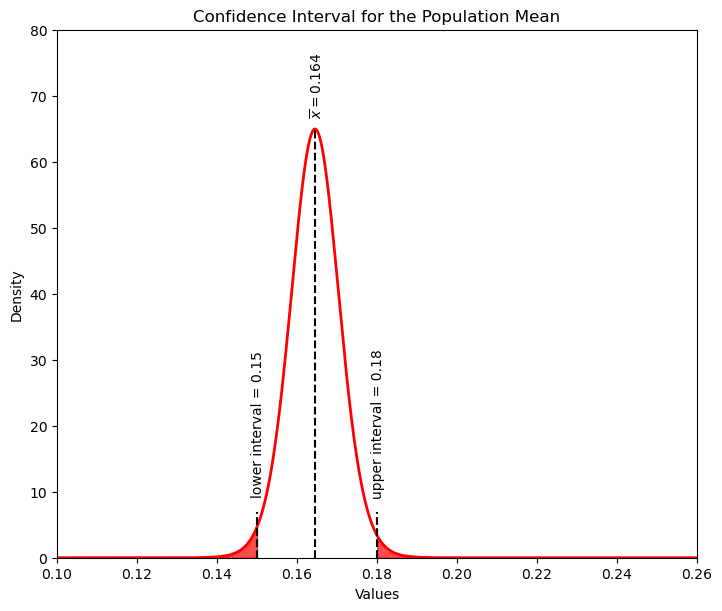

In [46]:
xval=np.linspace(.1,.26,1000)
tpdf=stats.t.pdf(xval,loc=smean,df=dof,scale=se)
plt.plot(xval,tpdf,color='red',lw=2); plt.xlabel('Values'); plt.ylabel('Density'); plt.title('Confidence Interval for the Population Mean')
plt.xlim([0.1,0.26]); plt.ylim([0,80])

plt.annotate('lower interval = ' + str(lower_CI),[lower_CI-0.0015,stats.t.pdf(lower_CI,df = dof, loc = smean, scale = sstdv/np.sqrt(n))+5],rotation=90.0)
plt.annotate('upper interval = ' + str(upper_CI),[upper_CI-0.0015,stats.t.pdf(upper_CI,df = dof, loc = smean, scale = sstdv/np.sqrt(n))+6],rotation=90.0)
plt.annotate(r'$\overline{x} = $' + str(np.round(smean,3)),[smean-0.0015,stats.t.pdf(smean,df = dof, loc = smean, scale = sstdv/np.sqrt(n))+2],rotation=90.0)
    
plt.fill_between(xval,tpdf,where= xval < lower_CI, color='red',alpha=0.7)
plt.fill_between(xval,tpdf,where= xval > upper_CI, color='red',alpha=0.7)
plt.vlines(smean,0,65,color='black',ls='--')
plt.vlines(lower_CI,0,7,color='black',ls='--'); plt.vlines(upper_CI,0,7,color='black',ls='--')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.3, hspace=0.4); plt.show()

 ## interval for the proportion

In [47]:
cx1=np.where(x1<.18,0,1)
prop_cx1=np.sum(cx1==1)/cx1.shape[0]
print("new binary feature, 1 = high porosity, 0 = low porosity")
print(cx1)
print("the proportion of high porosity rock in well x1 is ",np.round(prop_cx1,2))

new binary feature, 1 = high porosity, 0 = low porosity
[1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0]
the proportion of high porosity rock in well x1 is  0.35


In [48]:
se_prop=(prop_cx1*(1-prop_cx1))/math.sqrt(cx1.shape[0])
ci_prop_95_x1=stats.t.interval(.95,cx1.shape[0]-1,loc=prop_cx1,scale=se_prop)
print("the confidence interval for the x1 proportion of high porosity is ",np.round(ci_prop_95_x1,3))

the confidence interval for the x1 proportion of high porosity is  [0.244 0.456]


In [50]:
sample_prop=np.sum(cx1==1)/cx1.shape[0]
t_score=stats.t.ppf([.025,.975],df=len(df)-1)
se_prop=(prop_cx1*(1-prop_cx1))/math.sqrt(cx1.shape[0])
ci_prop_BH_95_x1=sample_prop+tscore+se_prop
print("statistic +/- t-score * standard error")
print(f"{np.round(sample_prop,3):^9} +/- {np.round(t_score[1],2):^7} * {np.round(se_prop,4):^14}")
print("the confidence interval for the x1 proportion of high porosity",np.round(ci_prop_BH_95_x1,3))

statistic +/- t-score * standard error
  0.35    +/-  2.09   *     0.0509    
the confidence interval for the x1 proportion of high porosity [-1.692  2.494]
